In [1]:
import warnings
warnings.simplefilter("ignore")

# linear algebra Library
import numpy as np 

# data processing
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler

# Plotting graphs Libraries
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Import tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Problem 2
### 1	Perform exploratory analysis on the data and Remove motor_UPDRS column

In [2]:
# Reading Data
data = pd.read_csv('/Users/chitra/Documents/Subjects/Analytic Python/assignment/assgnmnt5/parkinsons_updrs.data.csv')

In [3]:
#checking data 
data.head(4)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277


In [4]:
#list info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [5]:
# using describe to describe the data
data.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [6]:
#making sex column as a cateogry
data["sex"] = data["sex"].astype("category")
data.dtypes

subject#            int64
age                 int64
sex              category
test_time         float64
motor_UPDRS       float64
total_UPDRS       float64
Jitter(%)         float64
Jitter(Abs)       float64
Jitter:RAP        float64
Jitter:PPQ5       float64
Jitter:DDP        float64
Shimmer           float64
Shimmer(dB)       float64
Shimmer:APQ3      float64
Shimmer:APQ5      float64
Shimmer:APQ11     float64
Shimmer:DDA       float64
NHR               float64
HNR               float64
RPDE              float64
DFA               float64
PPE               float64
dtype: object

In [7]:
data.quantile()

subject#         22.000000
age              65.000000
test_time        91.523000
motor_UPDRS      20.871000
total_UPDRS      27.576000
Jitter(%)         0.004900
Jitter(Abs)       0.000035
Jitter:RAP        0.002250
Jitter:PPQ5       0.002490
Jitter:DDP        0.006750
Shimmer           0.027510
Shimmer(dB)       0.253000
Shimmer:APQ3      0.013700
Shimmer:APQ5      0.015940
Shimmer:APQ11     0.022710
Shimmer:DDA       0.041110
NHR               0.018448
HNR              21.920000
RPDE              0.542250
DFA               0.643600
PPE               0.205500
Name: 0.5, dtype: float64

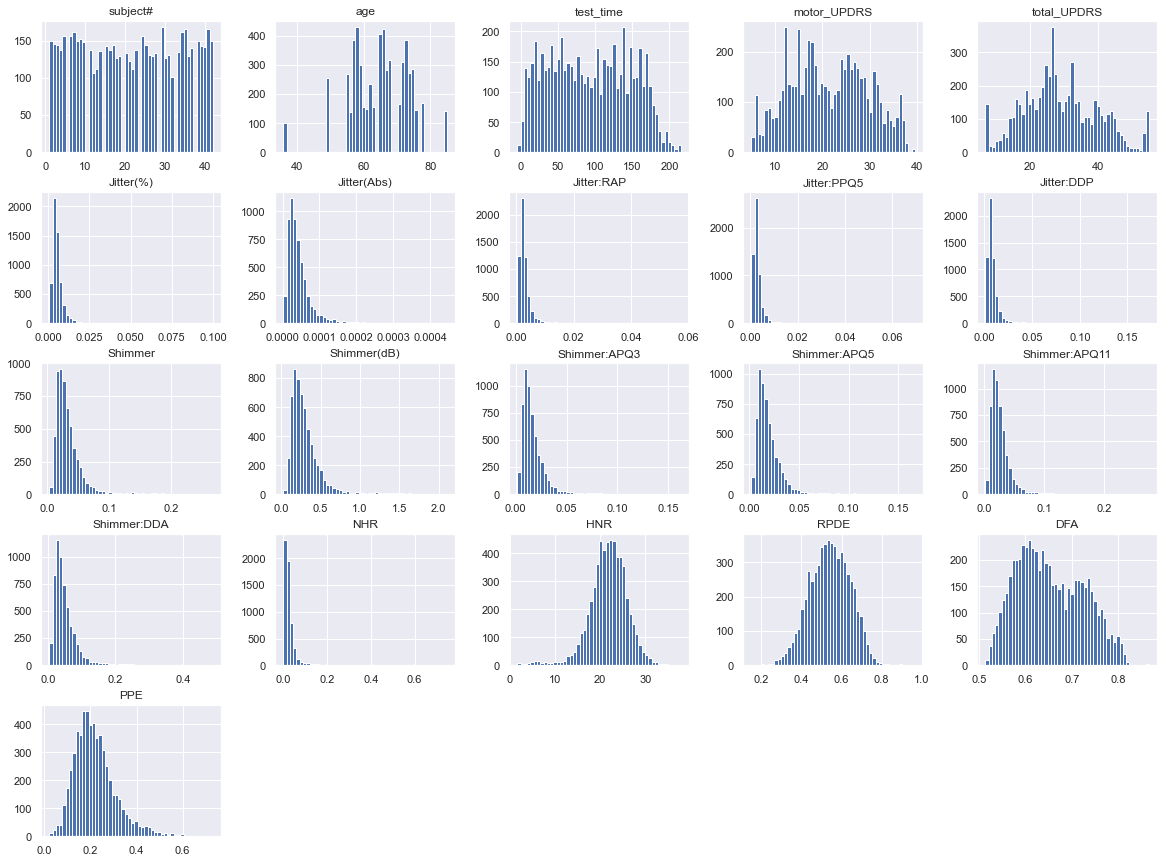

In [8]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

<AxesSubplot:>

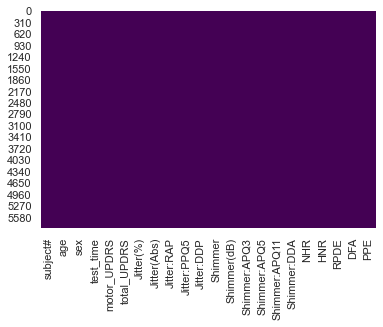

In [9]:
# plotting heatback 
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [10]:
#checking null in data 
data.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

There are no Missing Values

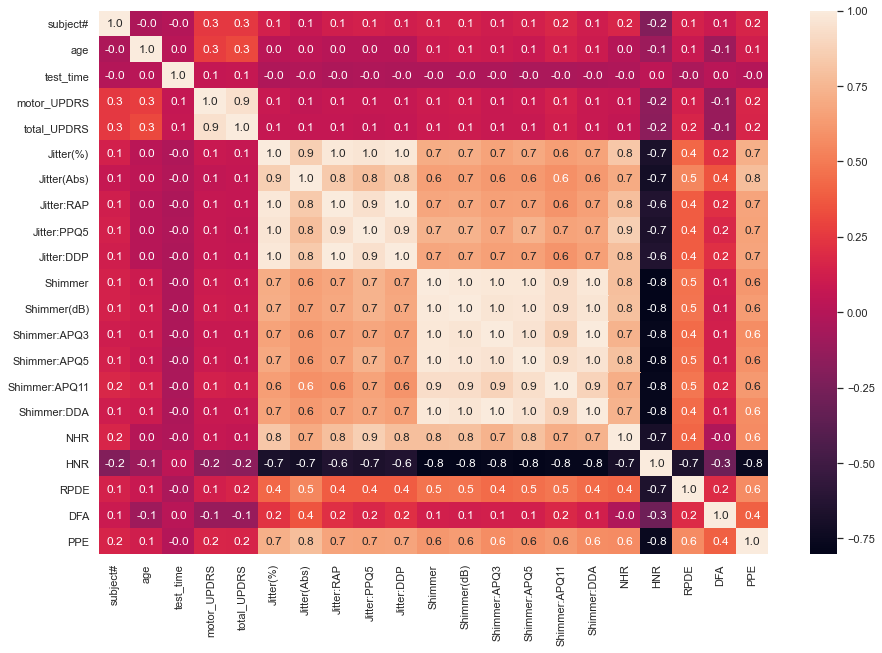

In [11]:
# plotting heatmap to check corelation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt=".1f")
plt.show()

The Column named HNR seems to have high negative correlation with most columns in the dataset

In [12]:
# copying data to motor_UPDRS and dropping it from main data frame
motor_UPDRS = data["motor_UPDRS"]
data = data.drop("motor_UPDRS",axis=1)

In [13]:
motor_UPDRS

0       28.199
1       28.447
2       28.695
3       28.905
4       29.187
         ...  
5870    22.485
5871    21.988
5872    21.495
5873    21.007
5874    20.513
Name: motor_UPDRS, Length: 5875, dtype: float64

In [14]:
#checking data frame again
data.head(4)

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277


In [15]:
data.shape

(5875, 21)

In [16]:
data.nunique(axis=0)

subject#           42
age                23
sex                 2
test_time        2442
total_UPDRS      1129
Jitter(%)        1305
Jitter(Abs)      4105
Jitter:RAP        853
Jitter:PPQ5       840
Jitter:DDP       1703
Shimmer          3581
Shimmer(dB)       852
Shimmer:APQ3     2664
Shimmer:APQ5     2850
Shimmer:APQ11    3283
Shimmer:DDA      4223
NHR              5532
HNR              4780
RPDE             5430
DFA              5282
PPE              4777
dtype: int64

In [17]:
# scaling the variables 
df_columns = data.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(data)

# rename columns (since now its an np array)
df = pd.DataFrame(df)
df.columns = df_columns

df.head()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0.0,0.734694,0.0,0.045076,0.570887,0.058390,0.071164,0.064324,0.039635,0.064433,...,0.098030,0.079287,0.067543,0.051764,0.079267,0.018723,0.551717,0.328638,0.097793,0.194544
1,0.0,0.734694,0.0,0.077034,0.581222,0.021884,0.032819,0.017305,0.015478,0.017303,...,0.073522,0.051720,0.053186,0.052753,0.051699,0.014474,0.704771,0.348330,0.144300,0.121335
2,0.0,0.734694,0.0,0.108957,0.591536,0.040137,0.050458,0.030065,0.023868,0.030178,...,0.074483,0.035577,0.039375,0.044291,0.035556,0.026651,0.590568,0.381812,0.085362,0.265104
3,0.0,0.734694,0.0,0.136105,0.600308,0.044877,0.054856,0.027618,0.031969,0.027673,...,0.144642,0.058674,0.064878,0.062791,0.058632,0.036834,0.629169,0.412583,0.181761,0.437884
4,0.0,0.734694,0.0,0.172487,0.612081,0.025413,0.040353,0.010488,0.012585,0.010486,...,0.072081,0.032162,0.044524,0.057515,0.032121,0.015160,0.675585,0.393664,0.134202,0.241814


In [18]:
#DEFINE MODEL 
y = data["total_UPDRS"]
X = data.drop("total_UPDRS",axis=1)
X_train, X_test, y_train,  y_test = train_test_split(X,y,train_size=0.8 ,test_size=0.2, random_state=23)

print(len(X_train))
print(len(X_test))

4700
1175


2. Using Cross-validation to build a Linear Regression Model

In [19]:
lm = LinearRegression()
lm.fit(X_train, y_train)


scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores 


array([0.2678474 , 0.22635922, 0.25936095, 0.22033634, 0.25097487])

In [20]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# creating a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing Hyperparameter tuning
hyper_params =  {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

# Using grid search for Linear Regression

lm = LinearRegression()
#lm.fit(X_train, y_train)
            


model_cv = GridSearchCV(lm, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             return_train_score=True, scoring='r2', verbose=1)

In [21]:
#Using the best model
folds = KFold(n_splits=5, random_state=100, shuffle=True)
scores_best = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds,)
r2 = scores_best.mean()
print("The r2 score for this model is:",r2)

The r2 score for this model is: 0.24627389558871005


3. Using cross-validation to build a regression tree model

In [22]:
model_dt = DecisionTreeRegressor(random_state=0,max_depth=5)
model_dt.fit(X_train, y_train)
predicted = model_dt.predict(X_test)

In [23]:
model_dt_scores = cross_val_score(model_dt, X_train, y_train, cv = 5, scoring='r2')
print("Mean cross validation score: {}".format(np.mean(model_dt_scores)))

Mean cross validation score: 0.7971346034458247


Finding the best model

In [24]:
parameters = {'max_depth':range(3,20)}
regressor = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
regressor.fit(X=X_train, y=y_train)
tree_model = regressor.best_estimator_
print ("The best score using Regression Tree is",regressor.best_score_,"and its depth is ", regressor.best_params_) 

The best score using Regression Tree is 0.9950561873089143 and its depth is  {'max_depth': 16}


In [25]:
from sklearn import tree

[Text(167.4, 199.32, 'X[0] <= 24.5\nmse = 114.146\nsamples = 4700\nvalue = 29.027'),
 Text(83.7, 163.07999999999998, 'X[0] <= 6.5\nmse = 88.527\nsamples = 2650\nvalue = 25.249'),
 Text(41.85, 126.83999999999999, 'X[18] <= 0.702\nmse = 107.256\nsamples = 706\nvalue = 33.043'),
 Text(20.925, 90.6, 'X[0] <= 4.5\nmse = 62.804\nsamples = 586\nvalue = 36.226'),
 Text(10.4625, 54.359999999999985, 'X[1] <= 73.0\nmse = 68.745\nsamples = 343\nvalue = 32.375'),
 Text(5.23125, 18.119999999999976, 'mse = 39.901\nsamples = 235\nvalue = 36.442'),
 Text(15.693750000000001, 18.119999999999976, 'mse = 17.206\nsamples = 108\nvalue = 23.526'),
 Text(31.387500000000003, 54.359999999999985, 'X[3] <= 111.36\nmse = 3.948\nsamples = 243\nvalue = 41.661'),
 Text(26.15625, 18.119999999999976, 'mse = 0.956\nsamples = 152\nvalue = 40.345'),
 Text(36.61875, 18.119999999999976, 'mse = 1.211\nsamples = 91\nvalue = 43.861'),
 Text(62.775000000000006, 90.6, 'X[0] <= 4.5\nmse = 33.156\nsamples = 120\nvalue = 17.496'),
 

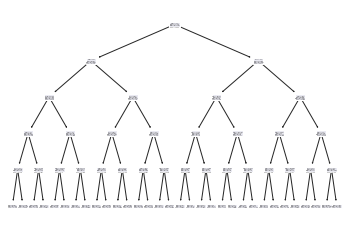

In [26]:
tree.plot_tree(model_dt)

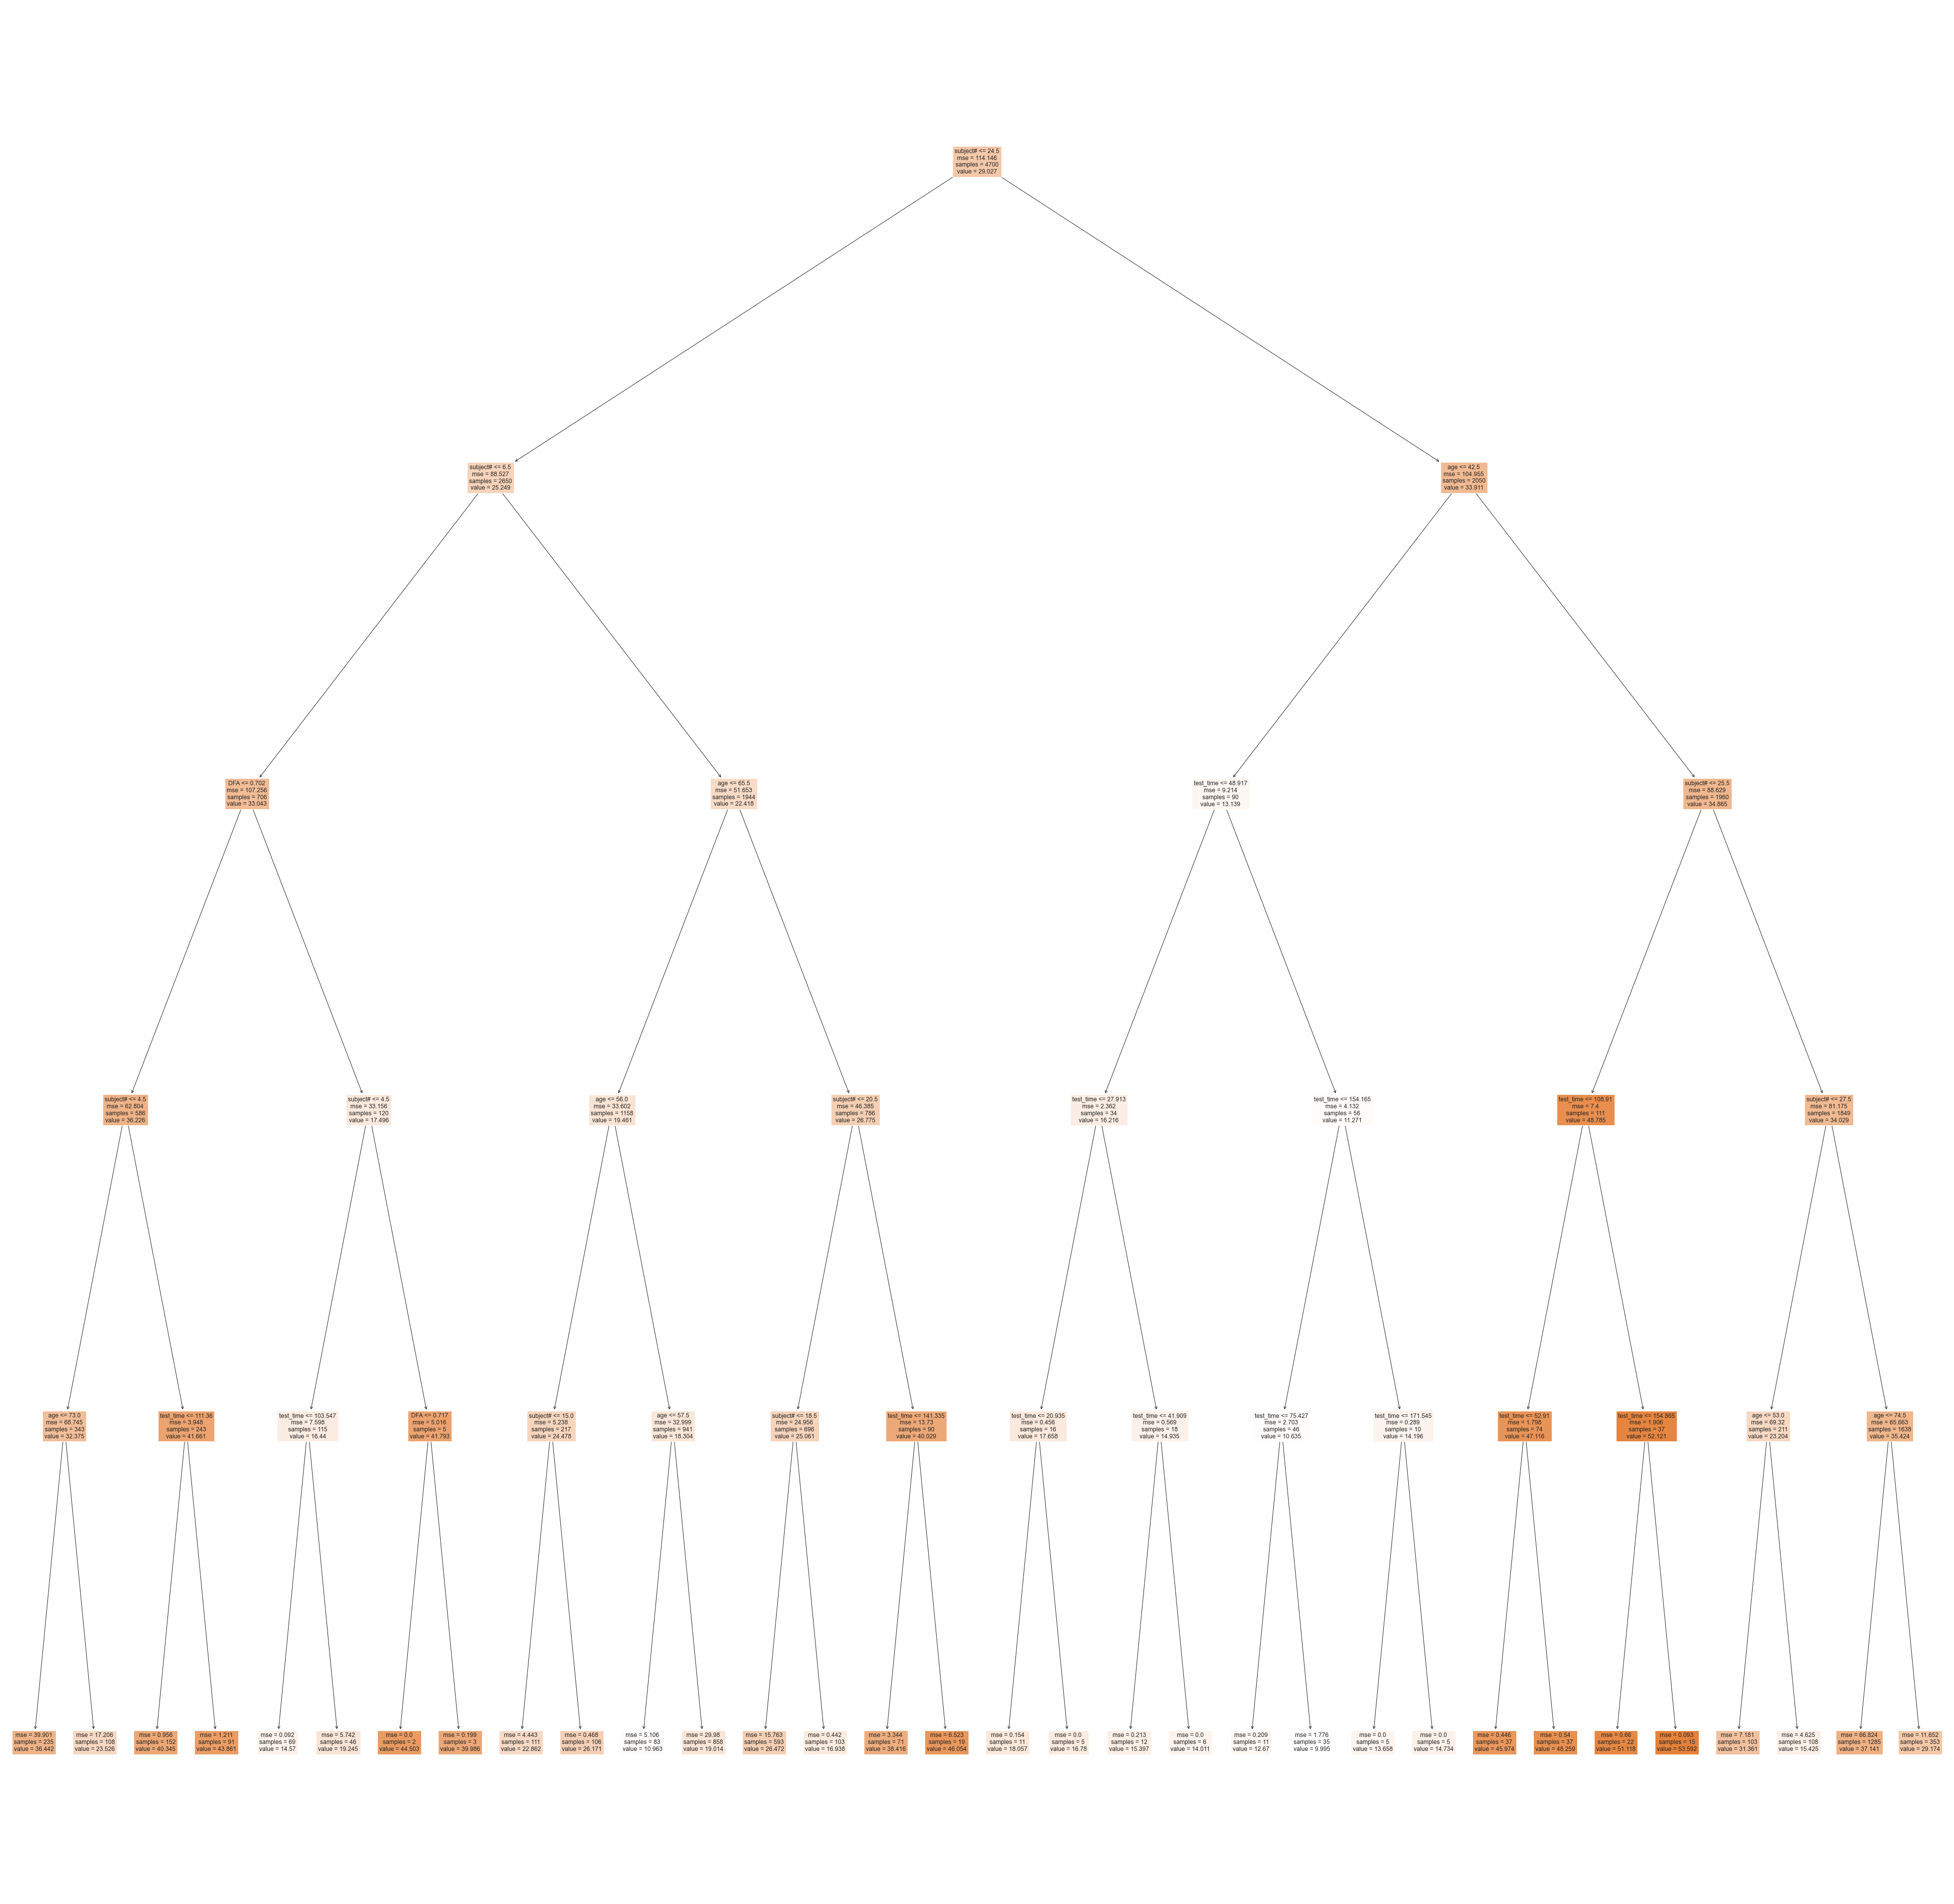

In [27]:
fig = plt.figure(figsize=(70,70))
_ = tree.plot_tree(model_dt, 
                   feature_names=X_train.columns,
                   class_names=y_train,
                   filled=True)
